In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

import functools

import math

import matplotlib.pyplot as plt

In [81]:
inputFile = "ID_data_mass_18122012_prepared.csv"

dataFrame = pd.read_csv(inputFile, header = 0, sep = ';')
print(dataFrame.shape)
data = dataFrame.values[0:10,0:3]
print(data)

numSamples = dataFrame.shape[0]
print("Num samples == " + str(numSamples))
numFeatures = dataFrame.shape[1]  #Last to features used as class designation
print("Num features == " + str(numFeatures))

(185, 33)
[[804 '05.06.08' 3576.3]
 [804 '06.06.08' 3576.3]
 [804 '07.06.08' 3576.3]
 [804 '08.06.08' 3576.3]
 [804 '09.06.08' 3576.3]
 [804 '17.06.11' 3576.3]
 [807 '16.09.04' 3590.0]
 [807 '16.09.04' 3590.0]
 [807 '17.09.04' 3590.0]
 [807 '17.09.04' 3590.0]]
Num samples == 185
Num features == 33


In [70]:
kgfColumnId = dataFrame.shape[1] - 1
gtotalColumnId = dataFrame.shape[1] - 2

listOfClassKeys = [str(line[kgfColumnId]) + '/' + str(line[gtotalColumnId]) for line in dataFrame.values]

keyFrequencies = Counter(listOfClassKeys).values()
# print(keyFrequencies)

uniqueKeys = Counter(listOfClassKeys).keys()
# print(uniqueKeys)

probabilities = [keyFrequency / numSamples for keyFrequency in keyFrequencies]
# print(probabilities)

entropy = functools.reduce(lambda accum, element : accum + (-element * math.log2(element)), 
                           probabilities)
print("Entropy == " + str(entropy))

Entropy == 4.010008655543741


In [71]:
featureEntropies = [0] * numFeatures
featureInformationGain = [0] * numFeatures
featureIntrinsicValue = [0] * numFeatures
featureIGRatio = [0] * numFeatures

for featureId in range(numFeatures):
    listOfFeatureValues = dataFrame.values[:, featureId]
    
    uniqueFeatureValues = Counter(listOfFeatureValues).keys()
    frequencies = Counter(listOfFeatureValues).values()
#     print(uniqueFeatureValues)
#     print(frequencies)
    
    valueWeights = dict(zip(uniqueFeatureValues,
                            [valueFrequency / numSamples for valueFrequency in frequencies]))
    
    valueFrequenciesTotal = dict(zip(uniqueFeatureValues,
                                     frequencies))
    
    a = dict(zip(uniqueFeatureValues, 
                 [dict()] * len(uniqueFeatureValues)))
    
    for key in a:
        a[key] = dict(zip(uniqueKeys, [0] * len(uniqueKeys)))
    
#     print(a[list(uniqueFeatureValues)[0]])
#     print("==========================================================")
    
    for sampleId in range(numSamples):
        a[listOfFeatureValues[sampleId]][listOfClassKeys[sampleId]] += 1
#         print(listOfFeatureValues[sampleId], "<<<>>>", listOfClassKeys[sampleId])
#         print(a[listOfFeatureValues[sampleId]])
#         print("==========================================================")
        
#     print(list(uniqueFeatureValues)[0])
#     print(a[list(uniqueFeatureValues)[0]])
        
    featureEntropy = 0
    
    for currentFeatureValue in uniqueFeatureValues:
        featureValueEntropy = 0
#         print(currentFeatureValue)
#         print(a[currentFeatureValue].items())

        for key, valueFrequencyInClass in a[currentFeatureValue].items():
            featureValueAndClassKeyPairProbability = valueFrequencyInClass / valueFrequenciesTotal[currentFeatureValue]
            
#             print(featureValueAndClassKeyPairProbability)
            
            if (0 == featureValueAndClassKeyPairProbability):
                continue
                
            featureValueEntropy -= featureValueAndClassKeyPairProbability * math.log2(featureValueAndClassKeyPairProbability)
            
        featureEntropy += featureValueEntropy * valueWeights[currentFeatureValue]
        
    featureEntropies[featureId] = featureEntropy
#     print("Feature's #{0} entropy == {1}".format(featureId, featureEntropy))
            
    featureInformationGain[featureId] = entropy - featureEntropy
#     print("Feature's #{0} IG == {1}".format(featureId, featureInformationGain[featureId]))
    
    featureIntrinsicValue[featureId] = functools.reduce(lambda accum, element : accum + (-element * math.log2(element)), 
                                                        valueWeights.values())
#     print("Feature's #{0} IV == {1}".format(featureId, featureIntrinsicValue[featureId]))

    featureIGRatio[featureId] = featureInformationGain[featureId] / featureIntrinsicValue[featureId]
    print("Feature's #{0} IGR == {1}".format(featureId, featureIGRatio[featureId]))

Feature's #0 IGR == 0.552230800531862
Feature's #1 IGR == 0.5353555730085765
Feature's #2 IGR == 0.5619770089537519
Feature's #3 IGR == 0.4666748779816262
Feature's #4 IGR == 0.5309004895297118
Feature's #5 IGR == 0.5329268227049818
Feature's #6 IGR == 0.5338965434934047
Feature's #7 IGR == 0.5152046955100573
Feature's #8 IGR == 0.5332154911177205
Feature's #9 IGR == 0.5313289329463614
Feature's #10 IGR == 0.49470566098703117
Feature's #11 IGR == 0.5288175723336703
Feature's #12 IGR == 0.525023736525547
Feature's #13 IGR == 0.5323431348016554
Feature's #14 IGR == 0.5349476557191343
Feature's #15 IGR == 0.5336998670904355
Feature's #16 IGR == 0.513920695091424
Feature's #17 IGR == 0.5349476557191343
Feature's #18 IGR == 0.5358237482360599
Feature's #19 IGR == 0.5295194549478894
Feature's #20 IGR == 0.48567373506543204
Feature's #21 IGR == 0.5480538957935434
Feature's #22 IGR == 0.5527733330181847
Feature's #23 IGR == 0.5476087644156982
Feature's #24 IGR == 0.5360603744576786
Feature's #

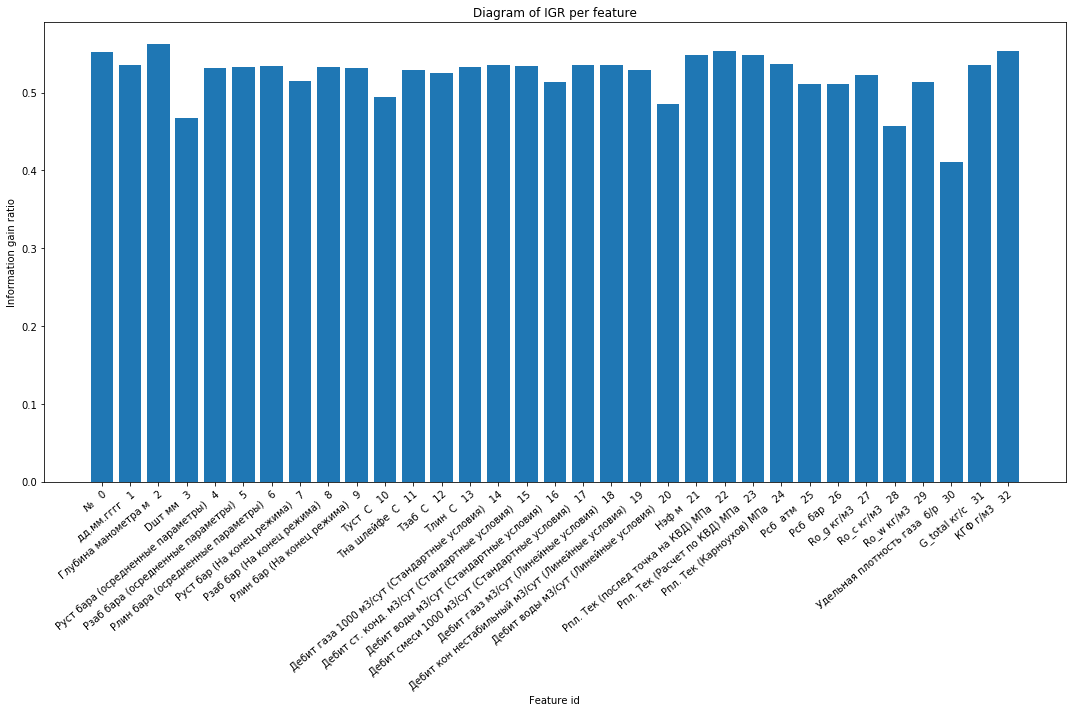

In [99]:
fig = plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.bar(range(numFeatures), featureIGRatio)

ax.set_xlabel('Feature id')
ax.set_ylabel('Information gain ratio')
ax.set_title('Diagram of IGR per feature')

xLabels = [""] * numFeatures
for i in range(numFeatures):
    xLabels[i] = dataFrame.columns[i] + "   " + str(i)
    
ax.set_xticks(np.arange(numFeatures))
ax.set_xticklabels(xLabels)
plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")

fig.tight_layout()
plt.show()

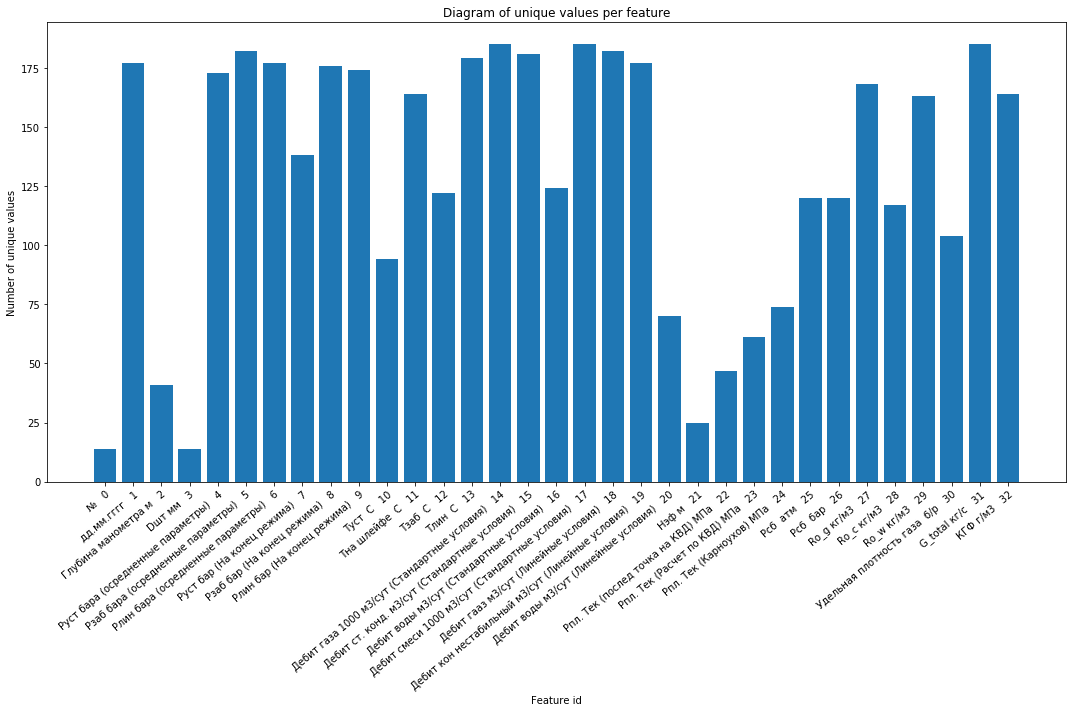

In [100]:
numUniqueValues = [0] * numFeatures

for featureId in range(numFeatures):
    listOfFeatureValues = dataFrame.values[:, featureId]
    uniqueFeatureValues = Counter(listOfFeatureValues).keys()
    numUniqueValues[featureId] = len(uniqueFeatureValues)

fig = plt.figure(figsize=(15, 10))
ax = plt.subplot()
ax.bar(range(numFeatures), numUniqueValues)

ax.set_xlabel('Feature id')
ax.set_ylabel('Number of unique values')
ax.set_title('Diagram of unique values per feature')

xLabels = [""] * numFeatures
for i in range(numFeatures):
    xLabels[i] = dataFrame.columns[i] + "   " + str(i)
    
ax.set_xticks(np.arange(numFeatures))
ax.set_xticklabels(xLabels)
plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")

fig.tight_layout()
plt.show()

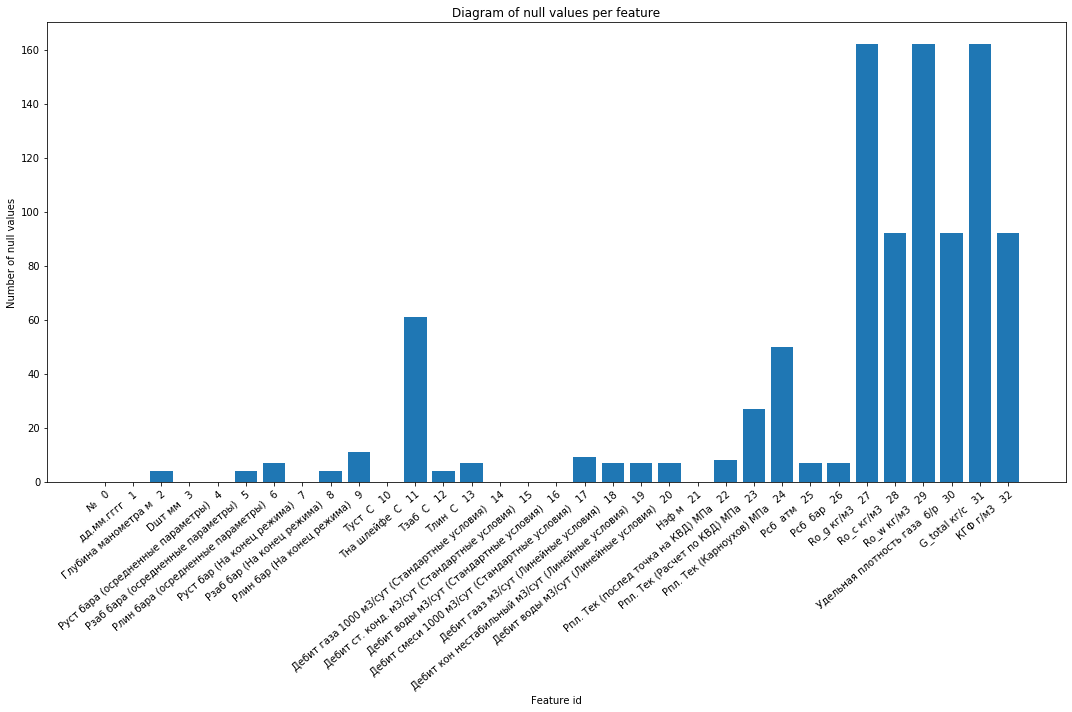

In [101]:
numNullValues = [0] * numFeatures

for featureId in range(2, numFeatures):
    for sampleId in range(numSamples):
        if (math.isnan(float(dataFrame.values[sampleId, featureId]))):
            numNullValues[featureId] += 1
            
fig = plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.bar(range(numFeatures), numNullValues)

ax.set_xlabel('Feature id')
ax.set_ylabel('Number of null values')
ax.set_title('Diagram of null values per feature')

xLabels = [""] * numFeatures
for i in range(numFeatures):
    xLabels[i] = dataFrame.columns[i] + "   " + str(i)
    
ax.set_xticks(np.arange(numFeatures))
ax.set_xticklabels(xLabels)
plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")

fig.tight_layout()
plt.show()

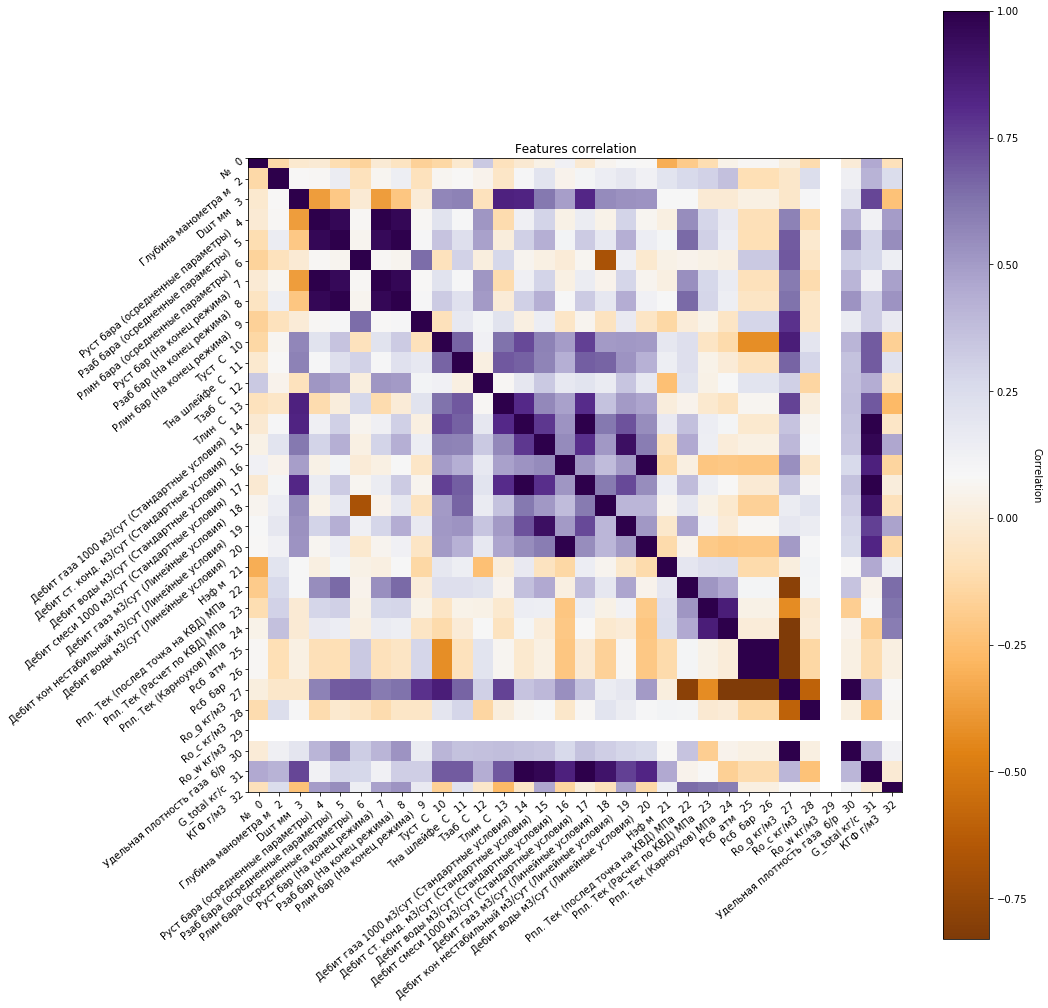

In [122]:
correlationMatrix = dataFrame.corr()

# print(correlationMatrix)

fig = plt.figure(figsize = (15, 15))
ax = plt.subplot()
im = ax.imshow(correlationMatrix, cmap = "PuOr")

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

ax.set_title('Features correlation')

xLabels = [""] * (numFeatures - 1)
xLabels[0] = dataFrame.columns[0] + "   " + str(0)

for i in range(1, numFeatures - 1):
    xLabels[i] = dataFrame.columns[i + 1] + "   " + str(i + 1)
    
ax.set_xticks(np.arange(numFeatures - 1))
ax.set_xticklabels(xLabels)
plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")
    
ax.set_yticks(np.arange(numFeatures - 1))
ax.set_yticklabels(xLabels)
plt.setp(ax.get_yticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")

fig.tight_layout()
plt.show()

In [124]:
Выкинуть признаки с 27го по 30й, т.к. много пропущенных значений
Использовать 12й, 16й и 21й признаки, т.к. они хорошы по всем показателям
Оставить 4й признак, выкинуть 5й, 7й и 8й, т.к. они все скоррелированы, а у четвёртого лучше IGR и меньше null'ов
Из группы скоррелированных признаков (3, 10, 11, 13, 14, 15, 17, 18, 19, 20), оставить только 18й
Из группы 22, 23, 24, оставиль только 22й
Из группы 25, 26, оставиль только 25й

Итого:
    Оставляем признаки 0, 2, 4, 6, 9, 12, 16, 18, 21, 22, 25

SyntaxError: invalid syntax (<ipython-input-124-b4ee32cc6308>, line 1)